## Plot Abstracts Submission

Academics generally submit their abstracts close to the deadline. This notebook demonstrate a quick and dirty plot of the cumulative number of abstracts received up-until the deadline. It was prepared for the 11th International Workshop on Sea Ice Modelling, Assimilation, Observations, Predictions and Verification (IICWG-DA-11, https://iicwg-da-11.met.no).

Feel free to steal and adapt for your conference. It works for other deadlines too, for example applications to open positions.

To be explored: implement a fit to the Universal Law of Procrastination (Durakiewicz, 2016).

Durakiewicz, T. (2016): A universal law of procrastination, Physics Today 69, 2, 11, https://doi.org/10.1063/PT.3.3064

In [14]:
import numpy as np
import datetime
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [15]:
filename = './data/submissions_time.txt'

In [16]:
def parsetime(v):
    # adapt the datetime format to your tile.
    return np.datetime64( datetime.datetime.strptime(str(v, 'utf-8'), '%Y-%m-%d %H:%M:%S') )

content = np.loadtxt(
    filename, 
    dtype={
        'names': ('timestamp',),
        'formats': ('datetime64[us]',)
    }, 
    converters={0: parsetime},delimiter='x'
)

# Extract the (ordered) times, and the cumulative number of abstracts
times = [c[0] for c in content]
times.sort()
cumul = range(1,len(times)+1)
total = len(cumul)

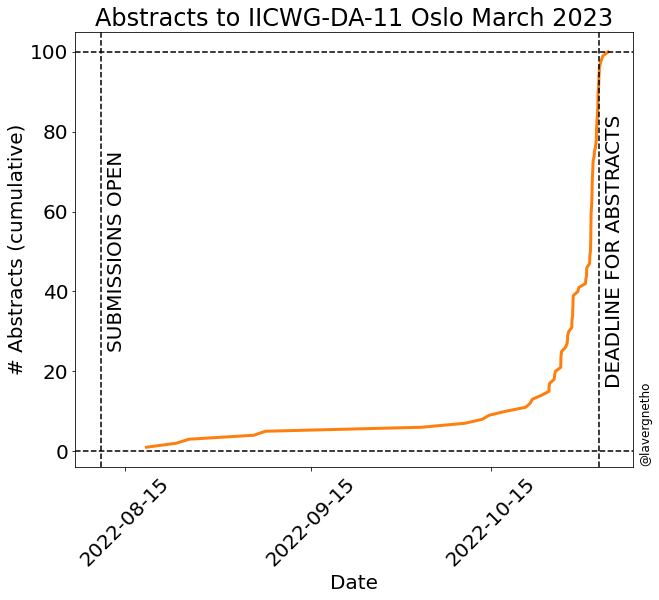

In [17]:
plt.plot_date(times, cumul, '-', c='C1', lw=3)
fig = plt.gcf()
fig.set_size_inches((10,8))
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::2],)
plt.xticks(rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('# Abstracts (cumulative)')
ax.set_title('Abstracts to IICWG-DA-11 Oslo March 2023')
ax.axhline(y=0,ls='--',c='k')
ax.axhline(y=total,ls='--',c='k')

dt0 = np.datetime64('2022-08-11T00:00:00')
dt1 = np.datetime64('2022-11-02T00:00:00')

ax.axvline(x=dt0,ls='--',c='k')
ax.text(dt0+np.timedelta64(1,'D'),total/2,'SUBMISSIONS OPEN', rotation=90, va='center',)

ax.axvline(x=dt1,ls='--',c='k')
ax.text(dt1+np.timedelta64(1,'D'),total/2,'DEADLINE FOR ABSTRACTS', rotation=90, va='center',)

ax.text(1.01,0.01,'@lavergnetho',rotation=90,fontsize=12,transform=ax.transAxes)

plt.savefig('submissions_time.png', bbox_inches='tight', dpi=150)
plt.show()